In [81]:
import networkx as nx
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

In [2]:
pathDataEpinions = "./data_epinions/"
pathDataDelicious = "./data_delicious/"

In [47]:
g_epinions_trust = nx.read_edgelist(pathDataEpinions+"trust_data.txt", create_using=nx.DiGraph, nodetype=int, data=(("weight", int),))

In [56]:
g_delicious_contact = nx.read_edgelist(pathDataDelicious+"user_contacts.dat", create_using=nx.Graph, nodetype=int, data=(("weight", int),("weight", int),("weight", int),("weight", int),("weight", int),("weight", int),))

Taille

In [40]:
nodes_epinions_trust = g_epinions_trust.number_of_nodes()
print("Nombre de noeuds : ", nodes_epinions_trust)

edges_epinions_trust = g_epinions_trust.number_of_edges()
print("Nombre d'aretes : ", edges_epinions_trust)

Nombre de noeuds :  49287
Nombre d'aretes :  487182


In [57]:
nodes_delicious_contact = g_delicious_contact.number_of_nodes()
print("Nombre de noeuds : ", nodes_delicious_contact)

edges_delicious_contact = g_delicious_contact.number_of_edges()
print("Nombre d'aretes : ", edges_delicious_contact)

Nombre de noeuds :  1861
Nombre d'aretes :  7664


Densité

In [30]:
users_epinions_trust = 49290
max_edges_epinions_trust = (users_epinions_trust**2 - users_epinions_trust)
density = edges_epinions_trust / max_edges_epinions_trust
print(f"Densité du graphe : {100 * density} %")

Densité du graphe : 0.02005314105842537 %


In [58]:
users_delicious_contact = 1867
max_edges_delicious_contact = (users_delicious_contact**2 - users_delicious_contact)
density = edges_delicious_contact / max_edges_delicious_contact
print(f"Densité du graphe : {100 * density} %")

Densité du graphe : 0.21998827724263753 %


Distribution des degrés du graphe

c:\Users\quent\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


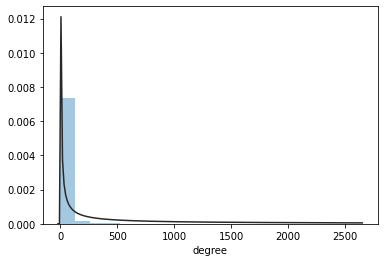

In [59]:
deg_epinions = pd.Series(dict(g_epinions_trust.degree()))
sns.distplot(deg_epinions, bins=20, kde=False, fit=stats.powerlaw , axlabel="degree")
plt.show()

c:\Users\quent\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


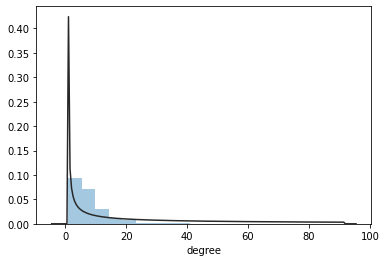

In [60]:
deg_delicious = pd.Series(dict(g_delicious_contact.degree()))
sns.distplot(deg_delicious, bins=20, kde=False, fit=stats.powerlaw , axlabel="degree")
plt.show()

Degré de sparsité des matrices d'interactions

In [33]:
sparsity = (max_edges_epinions_trust - edges_epinions_trust) / max_edges_epinions_trust
print(f"Degré de sparsité : {100 * sparsity} %")

Degré de sparsité : 99.97994685894157 %


In [61]:
sparsity = (max_edges_delicious_contact - edges_delicious_contact) / max_edges_delicious_contact
print(f"Degré de sparsité : {100 * sparsity} %")

Degré de sparsité : 99.78001172275737 %


Centralités

In [36]:
degree_cent_epinions = nx.degree_centrality(g_epinions_trust)

In [37]:
closeness_cent_epinions = nx.closeness_centrality(g_epinions_trust)

KeyboardInterrupt: 

In [ ]:
eigenvector_cent_epinions = nx.eigenvector_centrality(g_epinions_trust, max_iter=1000)

In [ ]:
katz_cent_epinions = nx.katz_centrality(g_epinions_trust, max_iter=1000)

In [ ]:
betweenness_cent_epinions = nx.betweenness_centrality(g_epinions_trust)

In [ ]:
pagerank_epinions = nx.pagerank(g_epinions_trust)

In [ ]:
hits_epinions = nx.hits(g_epinions_trust)[0]

In [ ]:
df = pd.DataFrame()
df["Node"] = degree_cent_epinions.keys()
df["Degree"] = degree_cent_epinions.values()
df["Closeness"] = closeness_cent_epinions.values()
df["Eigenvector"] = eigenvector_cent_epinions.values()
df["Katz"] = katz_cent_epinions.values()
df["Betweenness"] = betweenness_cent_epinions.values()
df["Pagerank"] = pagerank_epinions.values()
df["HITS"] = hits_epinions.values()
df

In [ ]:
sns.pairplot(df[["Degree", "Closeness", "Betweenness", "Katz", "Pagerank", "HITS"]])

In [ ]:
sns.heatmap(df.corr(), cmap="YlGnBu")

Small World Hypotesis

Shortest Path Length

In [42]:
node_ser_epinions = pd.Series(g_epinions_trust.nodes)
node_ser_sample_epinions = node_ser_epinions.sample(500)

shortest_path_sum = 0
nb_shortest_path = 0

for node1 in node_ser_sample_epinions.index:
    for node2 in node_ser_sample_epinions.index:
        if node1 != node2:
            try:
                shortest_path_sum += nx.shortest_path_length(g_epinions_trust, source=node1, target=node2)
                nb_shortest_path += 1
            except Exception:
                pass

print("average shortest path length = ", shortest_path_sum/nb_shortest_path)

average shortest path length =  4.591929306681257


In [65]:
node_ser_delicious = pd.Series(g_delicious_contact.nodes)
node_ser_sample_delicious = node_ser_delicious.sample(500)

shortest_path_sum = 0
nb_shortest_path = 0

for node1 in node_ser_sample_delicious.index:
    for node2 in node_ser_sample_delicious.index:
        if node1 != node2:
            try:
                shortest_path_sum += nx.shortest_path_length(g_delicious_contact, source=node1, target=node2)
                nb_shortest_path += 1
            except Exception:
                pass

print("average shortest path length = ", shortest_path_sum/nb_shortest_path)

average shortest path length =  5.4835957438938685


Strong Community Structure

In [64]:
random_g = nx.gnm_random_graph(n=nodes_epinions_trust, m=edges_epinions_trust)
print("average clustering g = ", nx.average_clustering(g_epinions_trust))
print("average clustering random graph = ", nx.average_clustering(random_g))

average clustering g =  0.14495220279302773
average clustering random graph =  0.0003841832178173464


In [63]:
random_g = nx.gnm_random_graph(n=nodes_delicious_contact, m=edges_delicious_contact)
print("average clustering g = ", nx.average_clustering(g_delicious_contact))
print("average clustering random graph = ", nx.average_clustering(random_g))

average clustering g =  0.4896310284563377
average clustering random graph =  0.004445669923133848


Node2Vec

In [68]:
from node2vec import Node2Vec as nv

WINDOW = 1
MIN_COUNT = 1
BATCH_WORDS = 4

g_emb = nv(g_delicious_contact, dimensions=16)

md1 = g_emb.fit(
    vector_size = 16,
    window = WINDOW,
    min_count = MIN_COUNT,
    batch_words = BATCH_WORDS
)

emb_df = (
    pd.DataFrame(
        [md1.wv.get_vector(str(n)) for n in g_delicious_contact.nodes()],
        index = g_delicious_contact.nodes
    )
)

Computing transition probabilities:  33%|███▎      | 614/1861 [00:00<00:01, 1098.49it/s]c:\Users\quent\AppData\Local\Programs\Python\Python39\lib\site-packages\node2vec\node2vec.py:143: RuntimeWarning: invalid value encountered in divide
  d_graph[source][self.FIRST_TRAVEL_KEY] = first_travel_weights / first_travel_weights.sum()
Generating walks (CPU: 1): 100%|██████████| 10/10 [00:14<00:00,  1.49s/it]


In [80]:
emb_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
8,0.694254,-2.357633,-0.249963,0.967742,1.747739,0.558880,0.231964,-1.967212,-1.497855,-0.427042,-0.129212,-0.045766,-1.352636,-1.864817,-0.561596,0.001750
28371,0.748755,-2.589697,-0.333073,0.764383,1.854024,0.669172,0.501500,-1.789530,-1.472716,-0.385302,-0.534715,0.001700,-1.117275,-1.762654,-0.581700,-0.029277
40306,0.741755,-2.798521,-0.428761,1.023040,2.201874,0.806020,0.493381,-2.073661,-1.899272,-0.354745,-0.457442,-0.275661,-1.124973,-2.016247,-1.004280,0.162618
85279,0.810207,-2.763934,-0.455225,0.913726,2.196762,0.784403,0.337681,-2.110599,-1.779132,-0.284123,-0.315482,-0.224469,-1.033821,-1.902319,-0.856601,0.110760
91764,0.866265,-2.728808,-0.371232,0.971027,2.023114,0.650535,0.495654,-2.292281,-1.645691,-0.431232,-0.427269,0.088436,-1.373858,-2.084807,-0.634981,-0.093717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63236,-1.611914,-1.080166,0.225568,2.719447,1.542015,1.679422,1.086158,-0.060771,0.688349,-1.059171,-0.502745,-0.747772,0.312428,1.609473,0.151743,-0.785277
78755,0.111980,-0.726748,0.292656,0.685373,1.977913,0.628250,1.068514,-0.129749,0.530534,-0.630236,-0.235279,-0.821407,0.262995,0.986843,0.146409,1.219979
69755,-0.414519,-1.614316,-0.479643,2.107293,0.513729,0.268561,0.230327,-1.694284,-0.604117,0.828961,-0.256373,0.663777,-0.090883,-0.498299,-1.162200,0.135979
77563,0.898487,-0.211526,0.379002,0.645956,1.123358,0.022703,1.548055,-0.446436,-0.175732,0.048832,-0.568028,0.125386,-1.036174,-0.325848,0.871970,0.601962


In [89]:
def norm(ui):
    n = 0
    for x in ui:
        n += x**2
    return np.sqrt(n)

def sim_cos(i, j):
    ui = emb_df.loc[i]
    uj = emb_df.loc[j]
    sim = 0
    for k in range(len(ui)):
        sim += ui[k] * uj[k]
    return sim / (norm(ui)*norm(uj))

sim_cos(8, 28371)

0.9895863555069524

In [95]:
def sim_adar(i, j):
    return list(nx.adamic_adar_index(g_delicious_contact, [(i, j)]))[0][-1]

sim_adar(8, 28371)

1.2218916001879356